### Отбор наиболее важных признаков при помощи метода случайного леса

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from russian_names import russian_names

In [45]:
df_pr = pd.read_csv('data_processed.csv')
df_pr.head(10)

,Unnamed: 0,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,0,1,8,0.555556,2,1,13,4,6,10,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,1
1,1,1,2,0.111111,11,1,1,3,4,4,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.000000,0
2,2,1,1,0.555556,5,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.000000,1
3,3,1,8,0.222222,15,1,23,27,6,4,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.000000,0
4,4,2,12,0.111111,3,1,22,28,10,10,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.000000,0
5,5,2,12,0.111111,17,12,22,27,10,8,...,0.192308,0.628193,0.0,0.0,0.217391,0.515152,0.25,0.619231,0.416667,0
6,6,1,1,0.111111,12,1,13,28,8,11,...,0.269231,0.704636,0.0,0.0,0.347826,0.242424,0.40,0.772423,0.000000,0
7,7,1,9,0.444444,11,1,22,27,10,10,...,0.000000,0.000000,0.0,0.0,0.217391,0.151515,0.00,0.000000,0.000000,1
8,8,1,1,0.333333,10,1,1,1,10,10,...,0.230769,0.735099,0.0,0.0,0.260870,0.212121,0.30,0.761538,0.000000,0
9,9,1,1,0.111111,10,1,1,14,5,8,...,0.192308,0.603974,0.0,0.0,0.260870,0.424242,0.10,0.726923,0.000000,1


In [46]:
df_pr = df_pr.drop('Unnamed: 0', axis=1)
df_pr

,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,1,8,0.555556,2,1,13,4,6,10,1,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,1
1,1,2,0.111111,11,1,1,3,4,4,1,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0
2,1,1,0.555556,5,1,22,27,10,10,1,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,1
3,1,8,0.222222,15,1,23,27,6,4,1,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0
4,2,12,0.111111,3,1,22,28,10,10,0,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,0.666667,15,1,1,1,6,5,0,...,0.192308,0.720530,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0
4420,1,1,0.222222,15,1,1,1,10,10,1,...,0.230769,0.635762,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,1
4421,1,1,0.111111,12,1,22,27,10,10,1,...,0.269231,0.790066,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,1
4422,1,1,0.111111,9,1,22,27,8,5,1,...,0.192308,0.731126,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0


Разделение на 4 выборки: 70%, 15%, 10%, 5%.

In [47]:
X = df_pr.copy()
# Отделить целевую переменную и записать ее в y
X = X.drop('Target', axis=1)
y = df_pr['Target']

In [48]:
# Делим на 80 и 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
# От train отделяем 1/8 => train - 70%, val - 10%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

In [50]:
# От test отделяем 1/4 => test - 15%, new - 5%
X_test, X_new, y_test, y_new = train_test_split(X_test, y_test, test_size=0.25, random_state=42, stratify=y_test)

In [51]:
# Проверка
splits = {
    'Обучающая': X_train,
    'Тестовая': X_test,
    'Валидационная': X_val,
    'Новые данные': X_new,
}

for name, split in splits.items():
    n = len(split)
    perc = n / len(X) * 100
    print(f'{name}: {n} строк, {perc:.1f} %')

Обучающая: 3096 строк, 70.0 %
Тестовая: 663 строк, 15.0 %
Валидационная: 443 строк, 10.0 %
Новые данные: 222 строк, 5.0 %


In [52]:
clf = RandomForestClassifier(n_estimators=100)
# Обучение модели
clf.fit(X_train,y_train)
# Вынести отсортированное влияние признаков
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Units 2 approved           0.140541
Units 2 grade              0.128322
Units 1 approved           0.113000
Units 1 grade              0.075566
Tuition fees up to date    0.064926
Age at enrollment          0.054592
Units 2 evaluations        0.043206
Course                     0.041068
Units 1 evaluations        0.035706
Father's occupation        0.034908
Mother's occupation        0.029700
Units 1 enrolled           0.026713
Application mode           0.026686
Mother's qualification     0.025764
Father's qualification     0.024736
Units 2 enrolled           0.022972
Debtor                     0.021386
Application order          0.016648
Scholarship holder         0.013947
Gender                     0.012291
Displaced                  0.009377
Previous qualification     0.007804
Units 1 credited           0.007533
Units 2 non_eval           0.006794
Units 2 credited           0.006207
Units 1 non_eval           0.005558
Marital status             0.004050
dtype: float64

Визуализация важности признаков

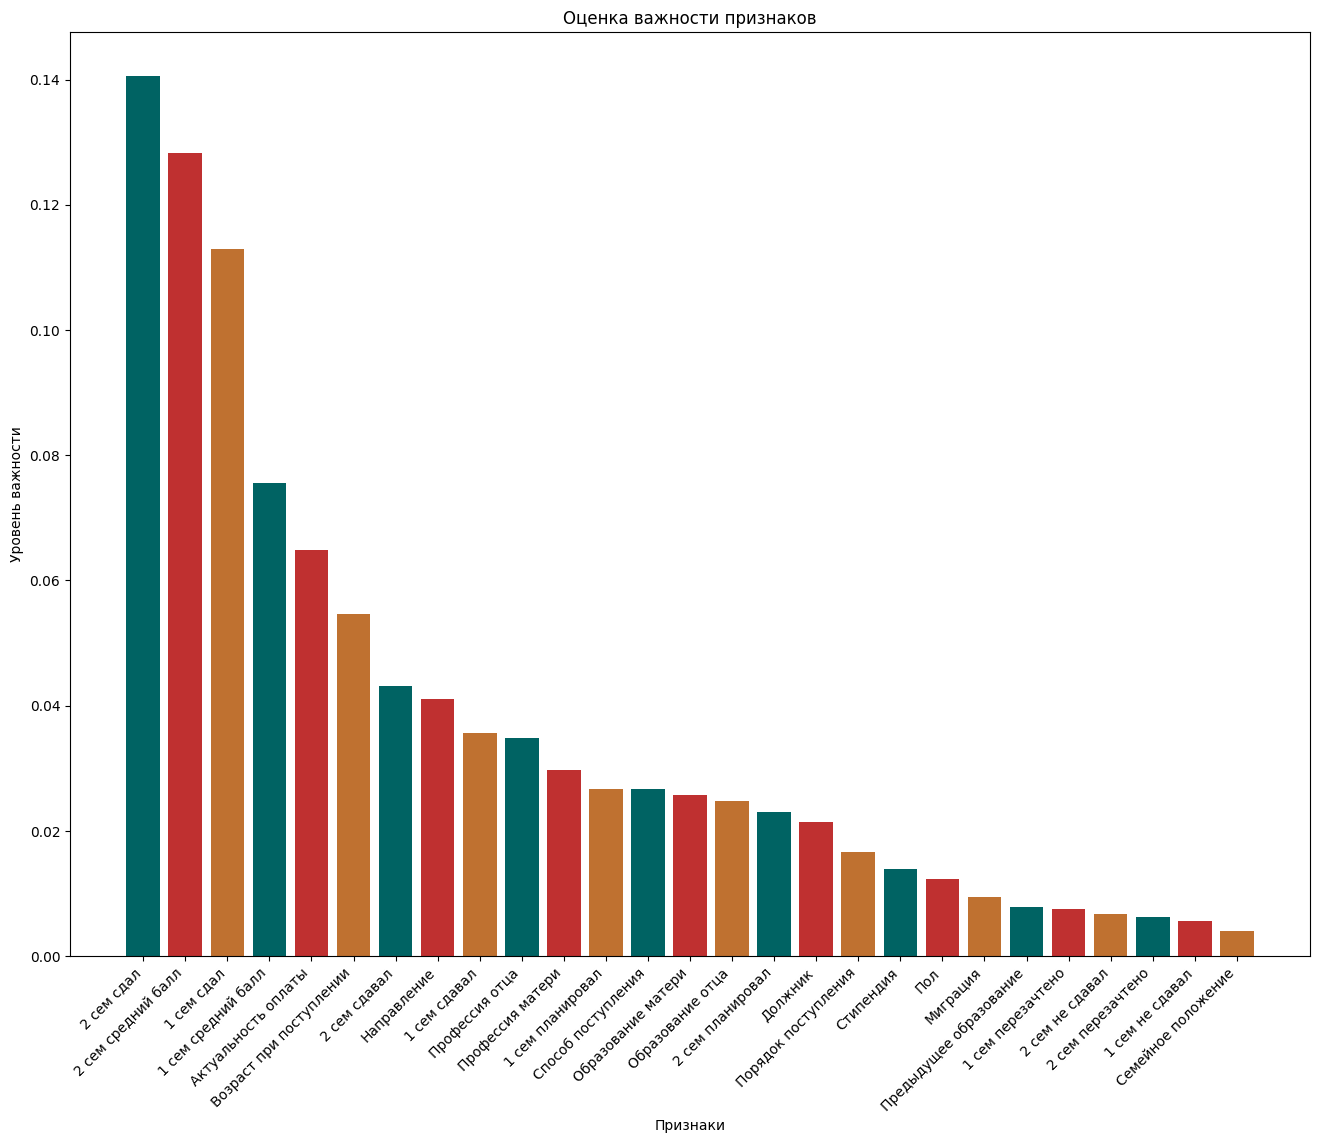

In [53]:
color=['#006363', '#BF3030', '#BF7130']
labels = [russian_names[column] for column in feature_imp.index]

plt.figure(figsize=(16,12))
plt.bar(feature_imp.index, feature_imp, color=color)

plt.title('Оценка важности признаков')
plt.xlabel('Признаки')
plt.ylabel('Уровень важности')

plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')

plt.show()

Удаляем ненужные признаки из всех трех выборок

In [54]:
list_to_drop = ['Displaced', 'Previous qualification', 'Units 2 credited', 'Units 1 credited',
                'Units 2 non_eval', 'Units 1 non_eval', 'Marital status']

In [55]:
X_train = X_train.drop(columns=list_to_drop)
X_test = X_test.drop(columns=list_to_drop)
X_val = X_val.drop(columns=list_to_drop)
X_new = X_new.drop(columns=list_to_drop)

### Обучение леса деревьев

In [13]:
# Классификатор на 300 деревьев для большей точности
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
# Предсказание меток классов
y_pred = clf.predict(X_val)

# Основные метрики
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       301
           1       0.81      0.65      0.72       142

    accuracy                           0.84       443
   macro avg       0.83      0.79      0.80       443
weighted avg       0.83      0.84      0.83       443



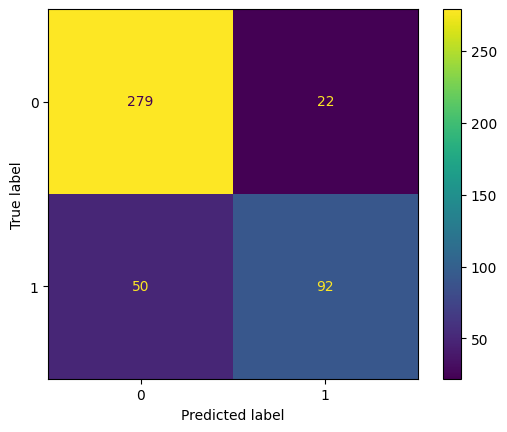

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
ax.plot()
plt.show()

### Обучение нейросетей

In [57]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers

Масштабирование категриальных признаков для нейросетей

In [58]:
columns = ['Application mode', 'Course', "Mother's qualification", "Father's qualification",
          "Mother's occupation", "Father's occupation"]
scaler = MinMaxScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_val[columns] = scaler.fit_transform(X_val[columns])
X_test[columns] = scaler.fit_transform(X_test[columns])
X_new[columns] = scaler.fit_transform(X_new[columns])

In [62]:
# Добавление id студентов
X_new['id_student'] = [f'{i:04d}' for i in range(1, len(X_new)+1)]

,Application mode,Application order,Course,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Debtor,Tuition fees up to date,Gender,...,Age at enrollment,Units 1 enrolled,Units 1 evaluations,Units 1 approved,Units 1 grade,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,id_student
3395,0.066667,0.111111,0.266667,0.545455,0.962963,0.363636,0.750000,0,1,0,...,0.056604,0.423077,0.333333,0.423077,0.730369,0.391304,0.272727,0.45,0.747863,0001
1491,0.000000,0.111111,0.866667,0.000000,0.074074,0.818182,0.750000,0,1,1,...,0.056604,0.230769,0.177778,0.230769,0.609272,0.260870,0.242424,0.30,0.592308,0002
2250,0.933333,0.111111,0.533333,0.000000,0.000000,0.363636,0.250000,0,1,1,...,0.094340,0.230769,0.155556,0.230769,0.653422,0.260870,0.181818,0.10,0.753846,0003
3095,0.000000,0.444444,0.533333,0.545455,1.000000,0.818182,0.750000,0,1,0,...,0.018868,0.230769,0.155556,0.230769,0.650899,0.260870,0.242424,0.30,0.615385,0004
2606,0.066667,0.111111,0.266667,0.954545,0.962963,0.454545,0.416667,0,1,0,...,0.094340,0.192308,0.155556,0.192308,0.752318,0.217391,0.303030,0.25,0.656923,0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0.533333,0.222222,0.533333,0.545455,0.000000,0.363636,0.250000,0,1,0,...,0.037736,0.230769,0.177778,0.153846,0.569536,0.260870,0.333333,0.25,0.619231,0218
4233,0.000000,0.555556,0.666667,1.000000,1.000000,0.818182,0.416667,0,1,0,...,0.037736,0.307692,0.177778,0.269231,0.794324,0.347826,0.242424,0.35,0.807308,0219
3677,0.000000,0.222222,0.866667,0.545455,1.000000,0.454545,0.000000,0,1,0,...,0.037736,0.230769,0.244444,0.038462,0.688742,0.217391,0.303030,0.00,0.000000,0220
4392,0.000000,0.111111,0.466667,0.954545,0.000000,0.363636,0.833333,0,1,0,...,0.018868,0.192308,0.133333,0.153846,0.596026,0.217391,0.242424,0.25,0.592308,0221


In [63]:
X_new.to_csv('new_data.csv', index=False)

#### Модель 1

In [17]:
model_1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_1 = model_1.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')


Epoch 1/40
97/97 [==============================] - 1s 5ms/step - loss: 0.5748 - accuracy: 0.6951 - auc: 0.7173 - val_loss: 0.4989 - val_accuracy: 0.7562 - val_auc: 0.8545
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.7930 - auc: 0.8380 - val_loss: 0.4243 - val_accuracy: 0.8149 - val_auc: 0.8782
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8285 - auc: 0.8622 - val_loss: 0.3940 - val_accuracy: 0.8194 - val_auc: 0.8900
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8437 - auc: 0.8737 - val_loss: 0.3839 - val_accuracy: 0.8262 - val_auc: 0.8945
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8450 - auc: 0.8804 - val_loss: 0.3787 - val_accuracy: 0.8307 - val_auc: 0.9004
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8501 - auc: 0.8841 - val_loss: 0.3691 - val_acc

Визуализация

In [18]:
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])


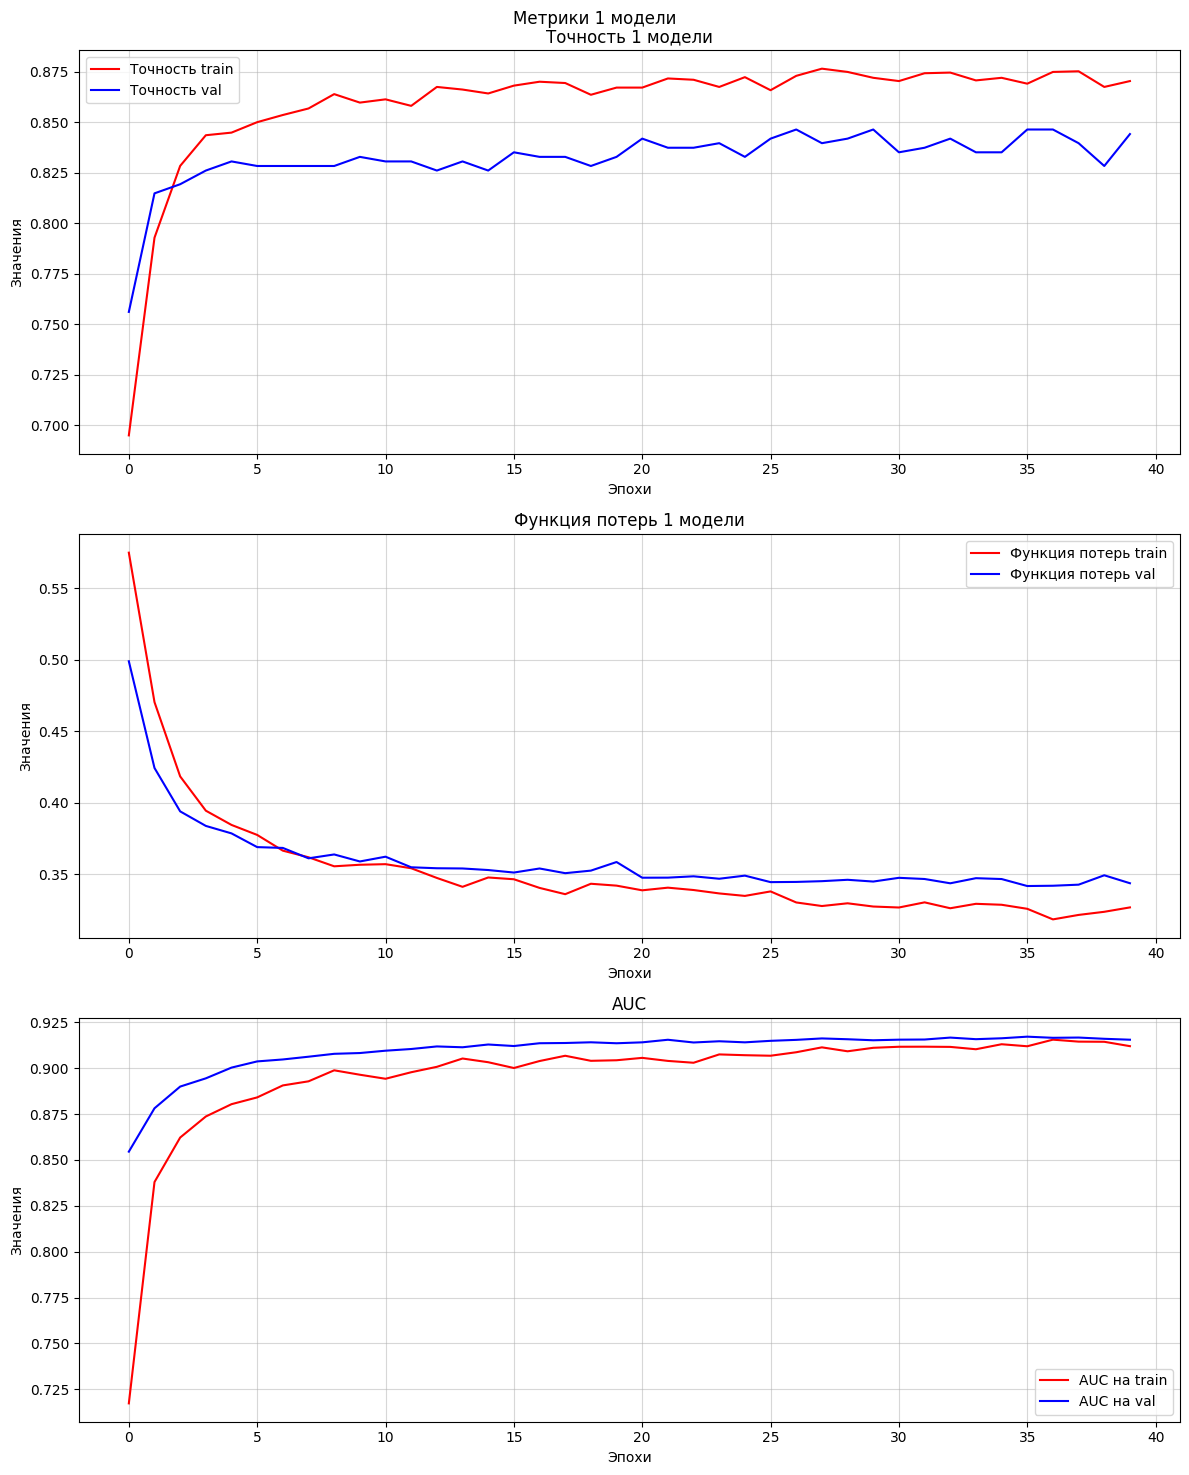

In [19]:
plt.figure(figsize=(12,15))
plt.suptitle('Метрики 1 модели')

plt.subplot(3,1,1)
plt.plot(history_1.history['accuracy'], color='red', label='Точность train')
plt.plot(history_1.history['val_accuracy'], color='blue', label='Точность val')
plt.title('Точность 1 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(history_1.history['loss'], color='red', label='Функция потерь train')
plt.plot(history_1.history['val_loss'], color='blue', label='Функция потерь val')
plt.title('Функция потерь 1 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(history_1.history['auc'], color='red', label='AUC на train')
plt.plot(history_1.history['val_auc'], color='blue', label='AUC на val')
plt.title('AUC')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

#### Модель 2

In [20]:
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_2 = model_2.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
97/97 [==============================] - 1s 4ms/step - loss: 0.5648 - accuracy: 0.7070 - auc: 0.7333 - val_loss: 0.4713 - val_accuracy: 0.7607 - val_auc: 0.8745
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8136 - auc: 0.8427 - val_loss: 0.4019 - val_accuracy: 0.8194 - val_auc: 0.8886
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8408 - auc: 0.8676 - val_loss: 0.3994 - val_accuracy: 0.8284 - val_auc: 0.8935
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8459 - auc: 0.8744 - val_loss: 0.3845 - val_accuracy: 0.8239 - val_auc: 0.8982
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8508 - auc: 0.8771 - val_loss: 0.3735 - val_accuracy: 0.8375 - val_auc: 0.9012
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.8582 - auc: 0.8900 - val_loss: 0.3778 - val_acc

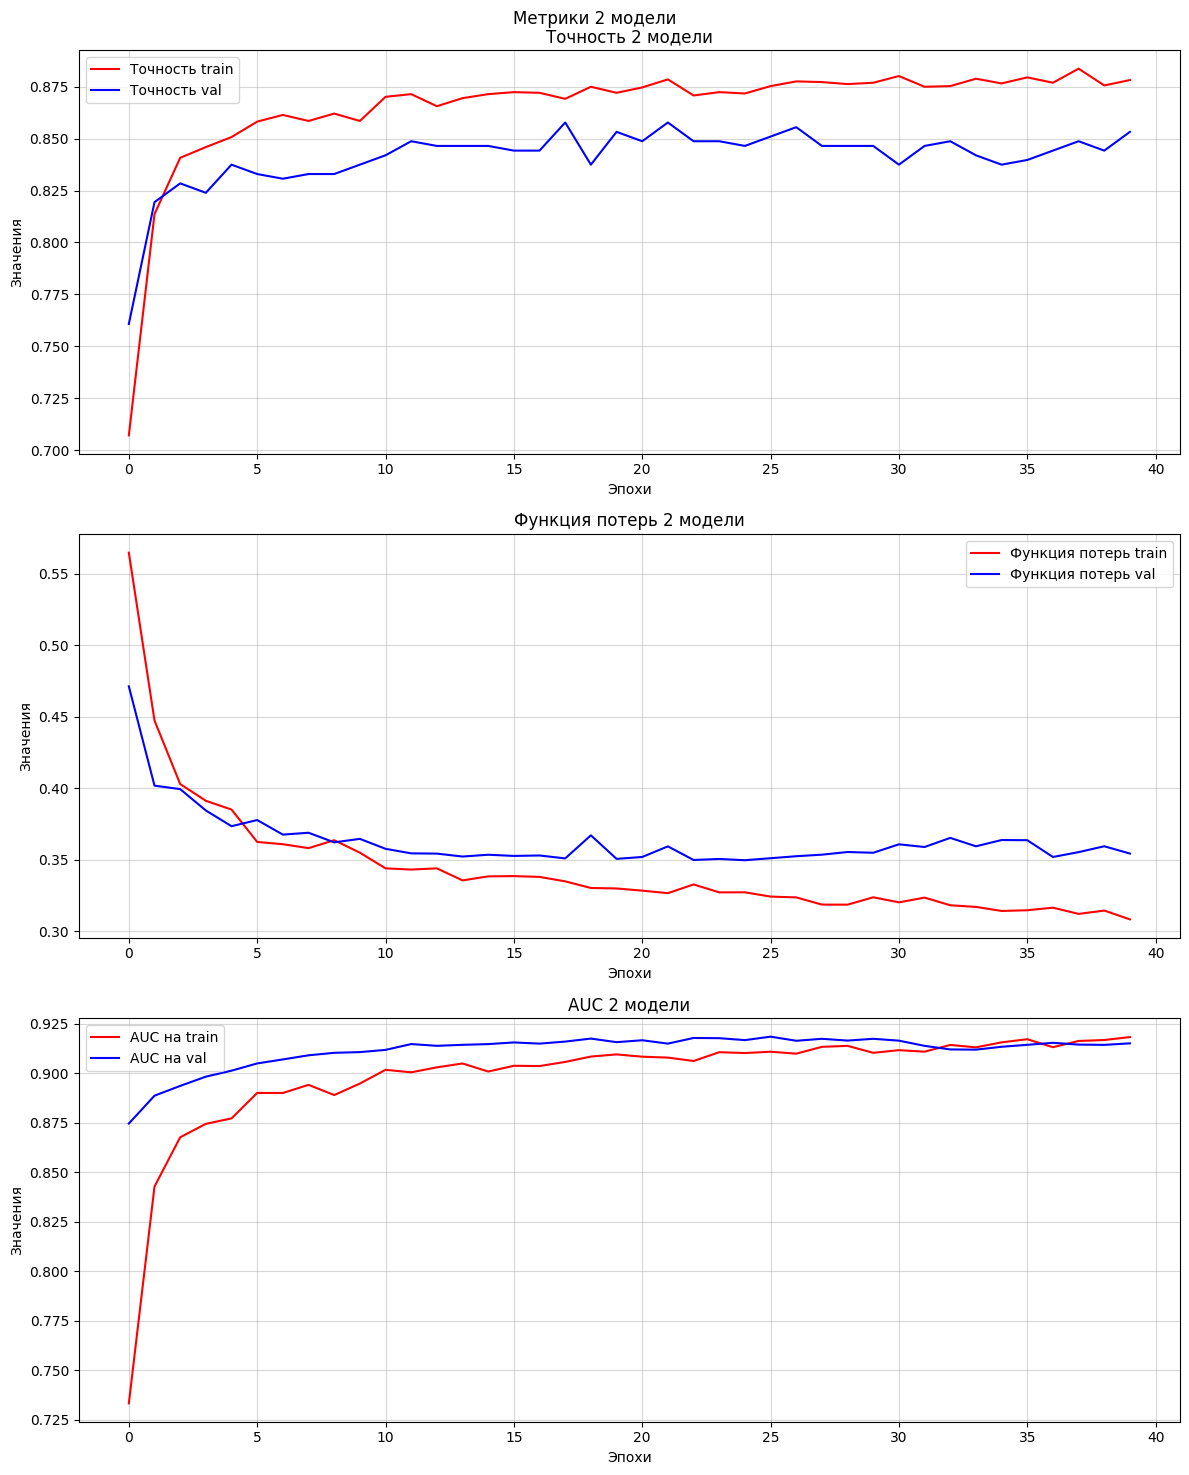

In [21]:
plt.figure(figsize=(12,15))
plt.suptitle('Метрики 2 модели')

plt.subplot(3,1,1)
plt.plot(history_2.history['accuracy'], color='red', label='Точность train')
plt.plot(history_2.history['val_accuracy'], color='blue', label='Точность val')
plt.title('Точность 2 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(history_2.history['loss'], color='red', label='Функция потерь train')
plt.plot(history_2.history['val_loss'], color='blue', label='Функция потерь val')
plt.title('Функция потерь 2 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(history_2.history['auc'], color='red', label='AUC на train')
plt.plot(history_2.history['val_auc'], color='blue', label='AUC на val')
plt.title('AUC 2 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

#### Модель 3

In [22]:
model_3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_3 = model_3.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
97/97 [==============================] - 1s 4ms/step - loss: 0.5724 - accuracy: 0.6948 - auc: 0.7057 - val_loss: 0.4892 - val_accuracy: 0.7923 - val_auc: 0.8685
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7829 - auc: 0.8233 - val_loss: 0.4227 - val_accuracy: 0.8149 - val_auc: 0.8736
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.8162 - auc: 0.8397 - val_loss: 0.4071 - val_accuracy: 0.8194 - val_auc: 0.8832
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8333 - auc: 0.8583 - val_loss: 0.3944 - val_accuracy: 0.8262 - val_auc: 0.8898
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8427 - auc: 0.8706 - val_loss: 0.3861 - val_accuracy: 0.8194 - val_auc: 0.8959
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8517 - auc: 0.8732 - val_loss: 0.3796 - val_acc

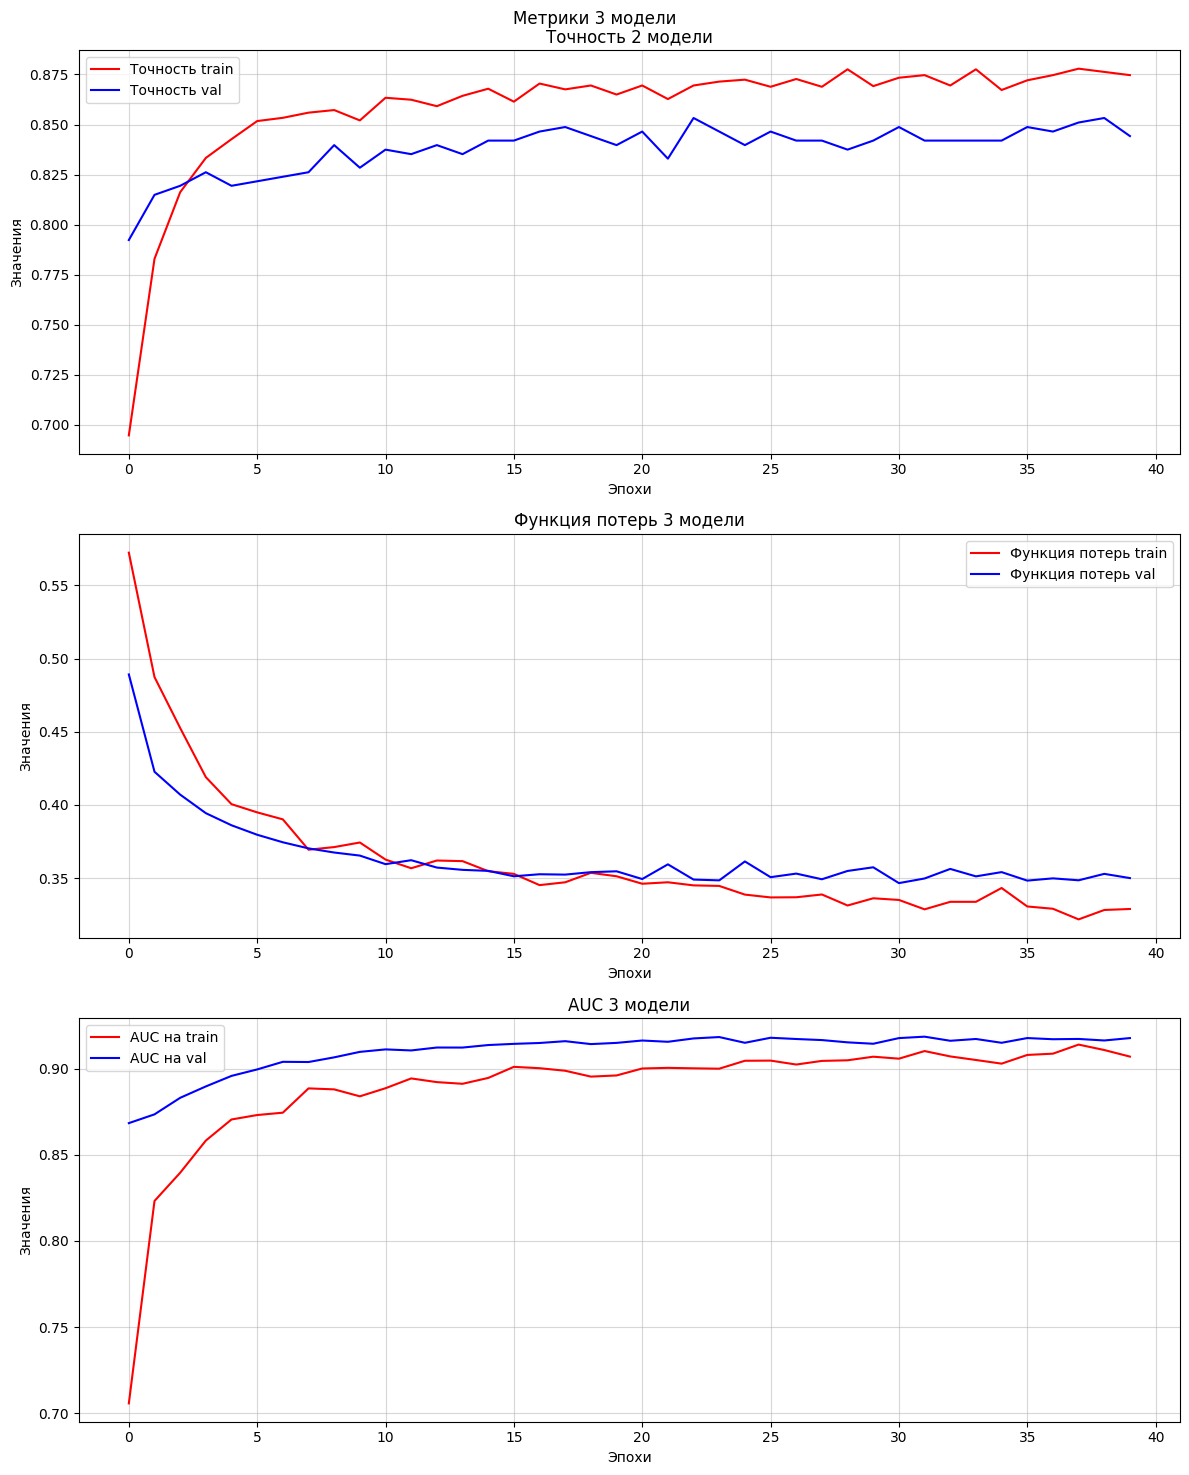

In [23]:
plt.figure(figsize=(12,15))
plt.suptitle('Метрики 3 модели')

plt.subplot(3,1,1)
plt.plot(history_3.history['accuracy'], color='red', label='Точность train')
plt.plot(history_3.history['val_accuracy'], color='blue', label='Точность val')
plt.title('Точность 2 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(history_3.history['loss'], color='red', label='Функция потерь train')
plt.plot(history_3.history['val_loss'], color='blue', label='Функция потерь val')
plt.title('Функция потерь 3 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(history_3.history['auc'], color='red', label='AUC на train')
plt.plot(history_3.history['val_auc'], color='blue', label='AUC на val')
plt.title('AUC 3 модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

### Оптимизация модели

In [24]:
# Метрики для простой модификации
model_metrics = ['accuracy', keras.metrics.AUC(name='auc')]

In [25]:
'''
Функция для отрисовки сравнения метрик двух моделей
Принимает history1 для первоначальной версии и history2 для модифицированной
'''
def plot_3_metrics(history1, history2):
    plt.figure(figsize=(12,10))
    # Заголовок всего холста
    plt.suptitle('Сравнение моделей')
    
    plt.subplot(3,2,1) # расположение: 3 строки, 2 столбца, 1 ячейка
    # Построение линейных графиков для метрик: 
    plt.plot(history1.history['accuracy'], color='#BF3030', label='Точность train')
    plt.plot(history1.history['val_accuracy'], color='#006363', label='Точность val')
    # Заголовок конкретного графика
    plt.title('Изначальная')
    # Подписи осей
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    # Сетка (полупрозрачная)
    plt.grid(alpha=0.5)
    # Легенда графика
    plt.legend()
    
    plt.subplot(3,2,2)
    plt.plot(history2.history['accuracy'], color='#BF3030', ls='--', label='Точность train')
    plt.plot(history2.history['val_accuracy'], color='#006363', ls='--', label='Точность val')
    plt.title('Обновленная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,2,3)
    plt.plot(history1.history['loss'], color='#BF3030', label='Функция потерь train')
    plt.plot(history1.history['val_loss'], color='#006363', label='Функция потерь val')
    plt.title('Изначальная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,2,4)
    plt.plot(history2.history['loss'], color='#BF3030', ls='--', label='Функция потерь train')
    plt.plot(history2.history['val_loss'], color='#006363', ls='--', label='Функция потерь val')
    plt.title('Обновленная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,2,5)
    plt.plot(history1.history['auc'], color='#BF3030', label='AUC на train')
    plt.plot(history1.history['val_auc'], color='#006363', label='AUC на val')
    plt.title('Изначальная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.subplot(3,2,6)
    plt.plot(history2.history['auc'], color='#BF3030', ls='--', label='AUC на train')
    plt.plot(history2.history['val_auc'], color='#006363', ls='--', label='AUC на val')
    plt.title('Обновленная')
    plt.xlabel('Эпохи')
    plt.ylabel('Значения')
    plt.grid(alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [26]:
# Регуляризация L2: 0.001, batch_size=64, 40 эпох 
model_a = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_a.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=model_metrics)

start_time = time.time()
history_a = model_a.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=64,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
49/49 [==============================] - 1s 7ms/step - loss: 0.6962 - accuracy: 0.6466 - auc: 0.5708 - val_loss: 0.6262 - val_accuracy: 0.6795 - val_auc: 0.8273
Epoch 2/40
49/49 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.7070 - auc: 0.7489 - val_loss: 0.5478 - val_accuracy: 0.7607 - val_auc: 0.8541
Epoch 3/40
49/49 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7649 - auc: 0.7987 - val_loss: 0.4938 - val_accuracy: 0.8059 - val_auc: 0.8695
Epoch 4/40
49/49 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7901 - auc: 0.8243 - val_loss: 0.4656 - val_accuracy: 0.8081 - val_auc: 0.8801
Epoch 5/40
49/49 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.8188 - auc: 0.8403 - val_loss: 0.4513 - val_accuracy: 0.8126 - val_auc: 0.8853
Epoch 6/40
49/49 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.8314 - auc: 0.8521 - val_loss: 0.4386 - val_acc

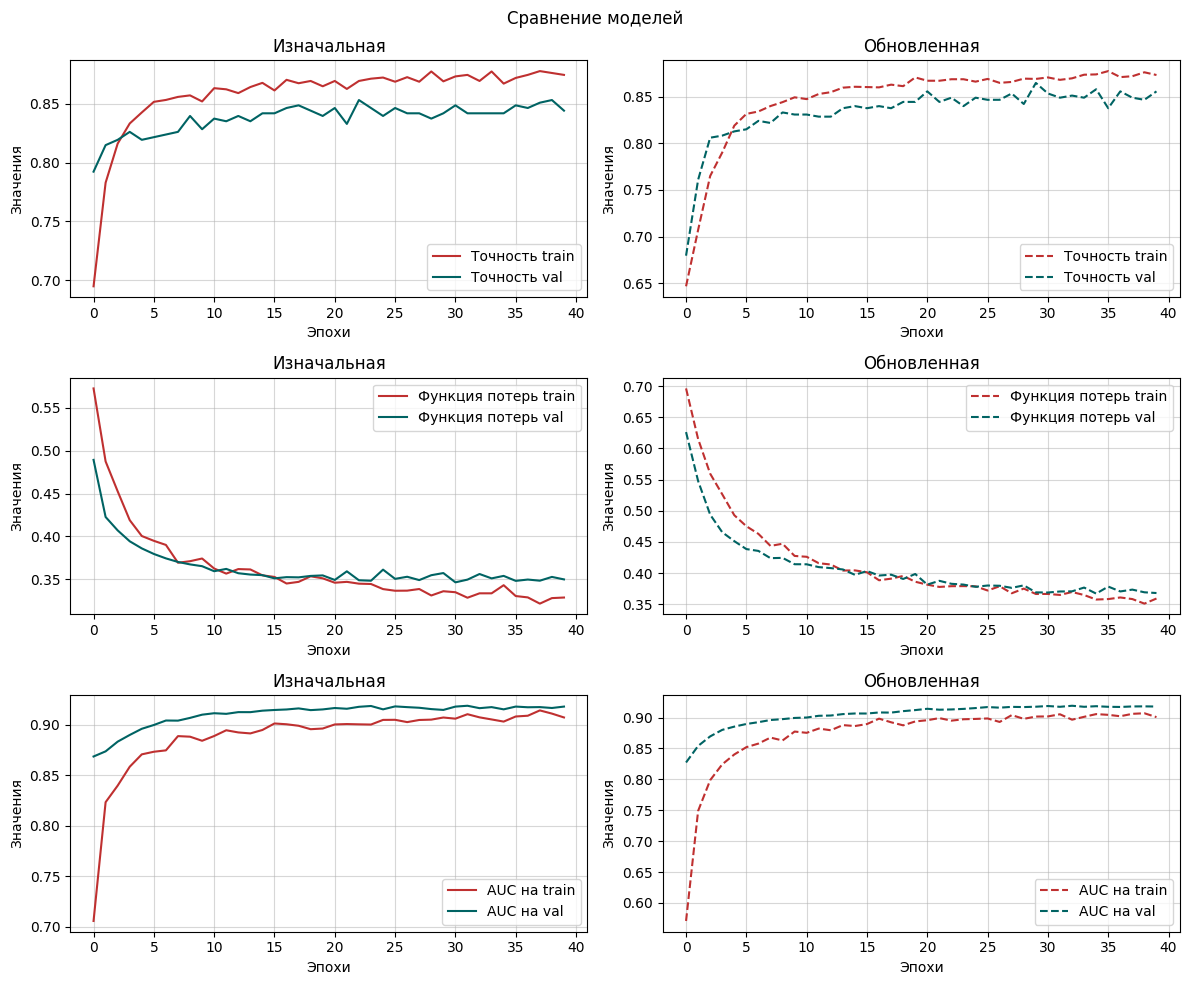

In [27]:
plot_3_metrics(history_3, history_a)

In [28]:
# Регуляризация L2: 0.0001, batch_size=32, 40 эпох 
model_b = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_b.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_b = model_b.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/40
97/97 [==============================] - 1s 5ms/step - loss: 0.6823 - accuracy: 0.5882 - auc: 0.5430 - val_loss: 0.5993 - val_accuracy: 0.6795 - val_auc: 0.7864
Epoch 2/40
97/97 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.6999 - auc: 0.7431 - val_loss: 0.4947 - val_accuracy: 0.7472 - val_auc: 0.8758
Epoch 3/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7962 - auc: 0.8289 - val_loss: 0.4323 - val_accuracy: 0.8126 - val_auc: 0.8834
Epoch 4/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8275 - auc: 0.8466 - val_loss: 0.4114 - val_accuracy: 0.8172 - val_auc: 0.8881
Epoch 5/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8379 - auc: 0.8617 - val_loss: 0.3999 - val_accuracy: 0.8217 - val_auc: 0.8941
Epoch 6/40
97/97 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8466 - auc: 0.8636 - val_loss: 0.3993 - val_acc

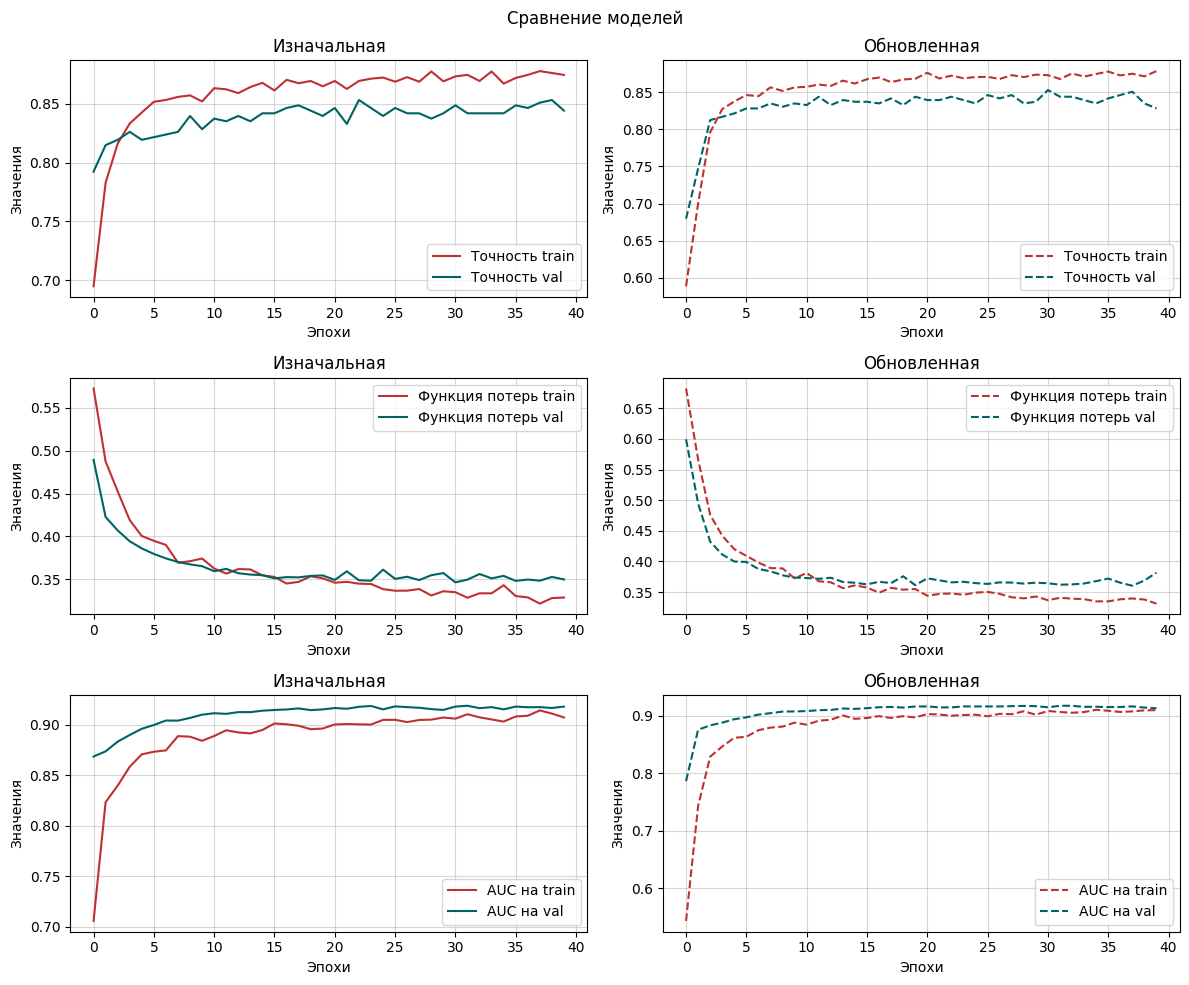

In [29]:
plot_3_metrics(history_3, history_b)

In [30]:
# Регуляризация L2: 0.0001, batch_size=16, 50 эпох 
model_c = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_c.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy', keras.metrics.AUC(name='auc')])

start_time = time.time()
history_c = model_c.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=16,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/50
194/194 [==============================] - 2s 4ms/step - loss: 0.5758 - accuracy: 0.7070 - auc: 0.7108 - val_loss: 0.4781 - val_accuracy: 0.7788 - val_auc: 0.8783
Epoch 2/50
194/194 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8143 - auc: 0.8425 - val_loss: 0.4249 - val_accuracy: 0.8059 - val_auc: 0.8920
Epoch 3/50
194/194 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8382 - auc: 0.8661 - val_loss: 0.3916 - val_accuracy: 0.8239 - val_auc: 0.8983
Epoch 4/50
194/194 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8424 - auc: 0.8734 - val_loss: 0.3898 - val_accuracy: 0.8330 - val_auc: 0.9054
Epoch 5/50
194/194 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8517 - auc: 0.8798 - val_loss: 0.3851 - val_accuracy: 0.8307 - val_auc: 0.9063
Epoch 6/50
194/194 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8559 - auc: 0.8843 - val_loss: 0.37

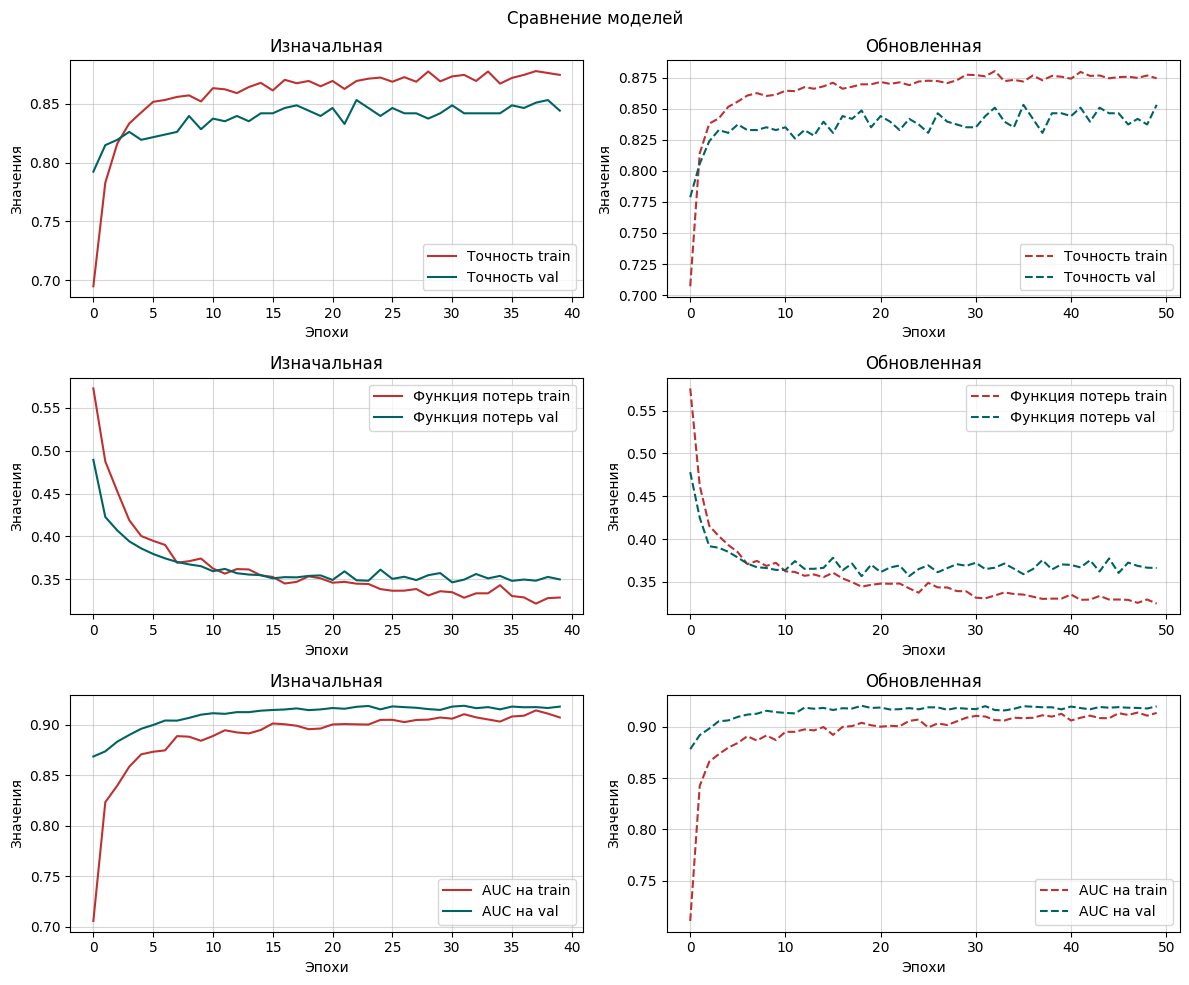

In [31]:
plot_3_metrics(history_3, history_c)

In [32]:
# Регуляризация L2: 0.0001, batch_size=20, 50 эпох 
model_d = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_d.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=model_metrics)

start_time = time.time()
history = model_d.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=20,
                        verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/50
155/155 [==============================] - 2s 4ms/step - loss: 0.5720 - accuracy: 0.7032 - auc: 0.7538 - val_loss: 0.4895 - val_accuracy: 0.8126 - val_auc: 0.8778
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7972 - auc: 0.8278 - val_loss: 0.4116 - val_accuracy: 0.8239 - val_auc: 0.8875
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8278 - auc: 0.8548 - val_loss: 0.3919 - val_accuracy: 0.8262 - val_auc: 0.8948
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8401 - auc: 0.8639 - val_loss: 0.3882 - val_accuracy: 0.8217 - val_auc: 0.9002
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8463 - auc: 0.8771 - val_loss: 0.3800 - val_accuracy: 0.8284 - val_auc: 0.9038
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8485 - auc: 0.8806 - val_loss: 0.38

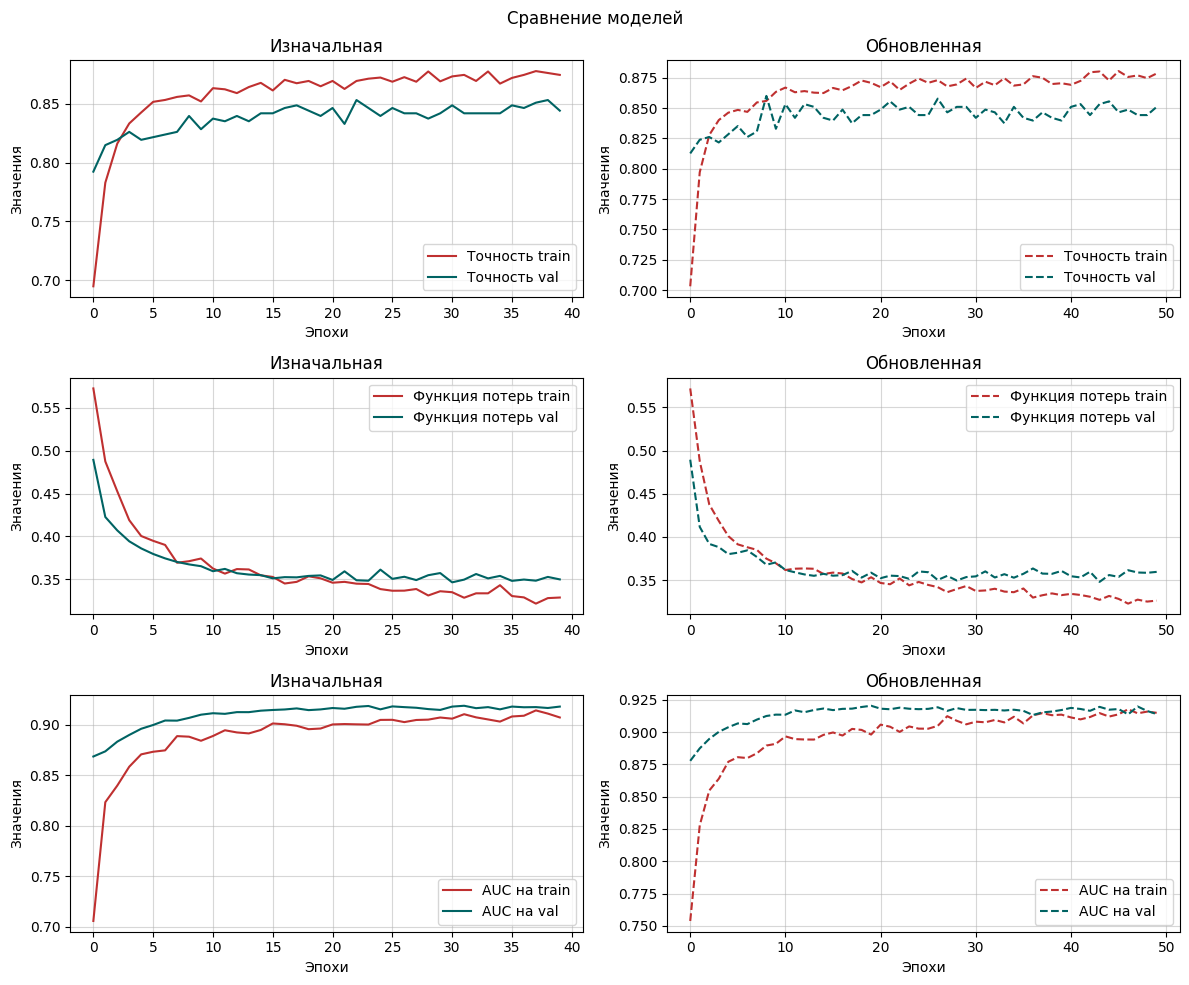

In [33]:
plot_3_metrics(history_3, history)

In [34]:
callback = keras.callbacks.EarlyStopping(monitor='val_auc', patience=5)

In [35]:
# Регуляризация L2: 0.0001, batch_size=20, 50 эпох, ранний останов
model_e = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

callback = keras.callbacks.EarlyStopping(monitor='val_auc', patience=5)

model_e.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=model_metrics)

start_time = time.time()
history_e = model_e.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,
                      batch_size=20, callbacks=[callback], verbose=1)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.3f} секунд')

Epoch 1/50
155/155 [==============================] - 2s 3ms/step - loss: 0.5931 - accuracy: 0.6844 - auc: 0.7212 - val_loss: 0.4748 - val_accuracy: 0.7810 - val_auc: 0.8635
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8039 - auc: 0.8344 - val_loss: 0.4149 - val_accuracy: 0.8217 - val_auc: 0.8851
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8304 - auc: 0.8606 - val_loss: 0.4119 - val_accuracy: 0.8217 - val_auc: 0.8901
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8421 - auc: 0.8683 - val_loss: 0.3886 - val_accuracy: 0.8239 - val_auc: 0.8973
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8463 - auc: 0.8760 - val_loss: 0.3824 - val_accuracy: 0.8262 - val_auc: 0.9015
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8501 - auc: 0.8765 - val_loss: 0.38

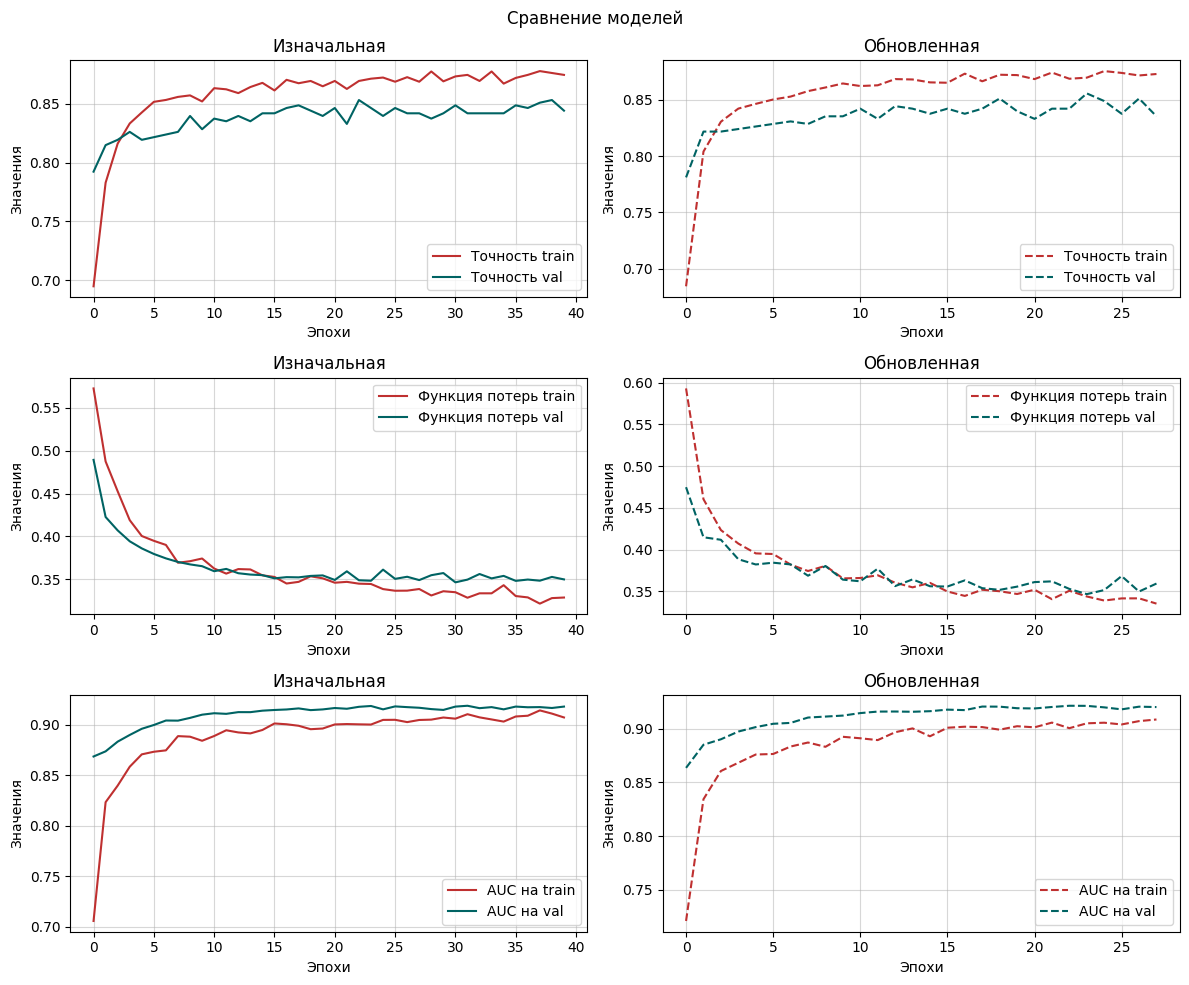

In [36]:
plot_3_metrics(history_3, history_e)

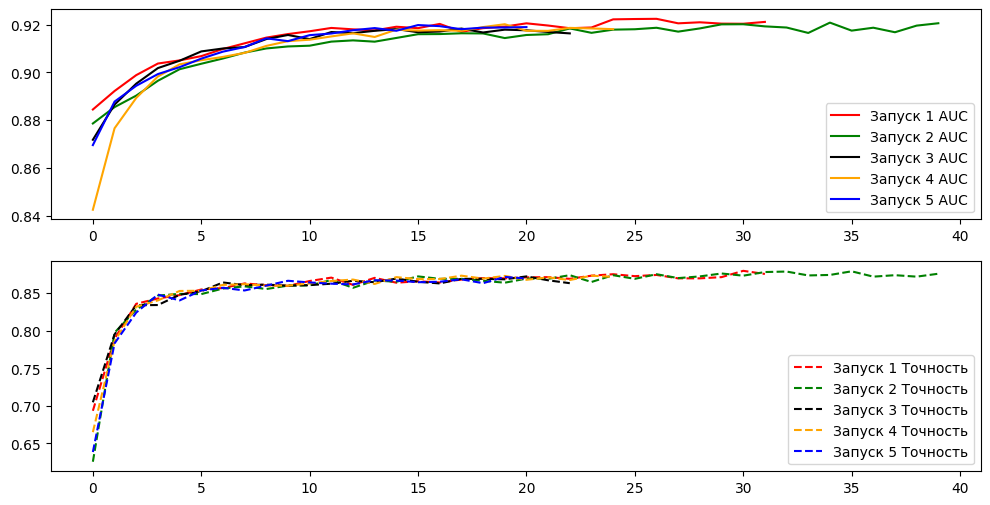

In [37]:
def create_model():
    model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
    model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=model_metrics)
    return model

#plt.subplot(2,1,1)
#plt.subplot(2,1,2)
colors=['red', 'green', 'black', 'orange', 'blue']
plt.figure(figsize=(12, 6))

for i in range(5):
    model = create_model()
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50,
                      batch_size=20, callbacks=[callback], verbose=0)
    plt.subplot(2,1,1)
    plt.plot(history.history['val_auc'], color=colors[i], label=f'Запуск {i+1} AUC')
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'], color=colors[i], ls='--', label=f'Запуск {i+1} Точность')

plt.subplot(2,1,1)
plt.legend()
plt.subplot(2,1,2)
plt.legend()
plt.show()

### Проверка финальной модели на тестовом наборе данных

In [39]:
# Итоговая модель: тест на тестовых данных
model_final = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=model_metrics)

history_final = model_final.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50,
                      batch_size=20, callbacks=[callback], verbose=1)

Epoch 1/50
155/155 [==============================] - 2s 4ms/step - loss: 0.5807 - accuracy: 0.6906 - auc: 0.7579 - val_loss: 0.4898 - val_accuracy: 0.8220 - val_auc: 0.9085
Epoch 2/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.8001 - auc: 0.8332 - val_loss: 0.3696 - val_accuracy: 0.8552 - val_auc: 0.9125
Epoch 3/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8320 - auc: 0.8625 - val_loss: 0.3483 - val_accuracy: 0.8612 - val_auc: 0.9168
Epoch 4/50
155/155 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8440 - auc: 0.8754 - val_loss: 0.3340 - val_accuracy: 0.8703 - val_auc: 0.9210
Epoch 5/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8469 - auc: 0.8796 - val_loss: 0.3379 - val_accuracy: 0.8643 - val_auc: 0.9213
Epoch 6/50
155/155 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8495 - auc: 0.8775 - val_loss: 0.32

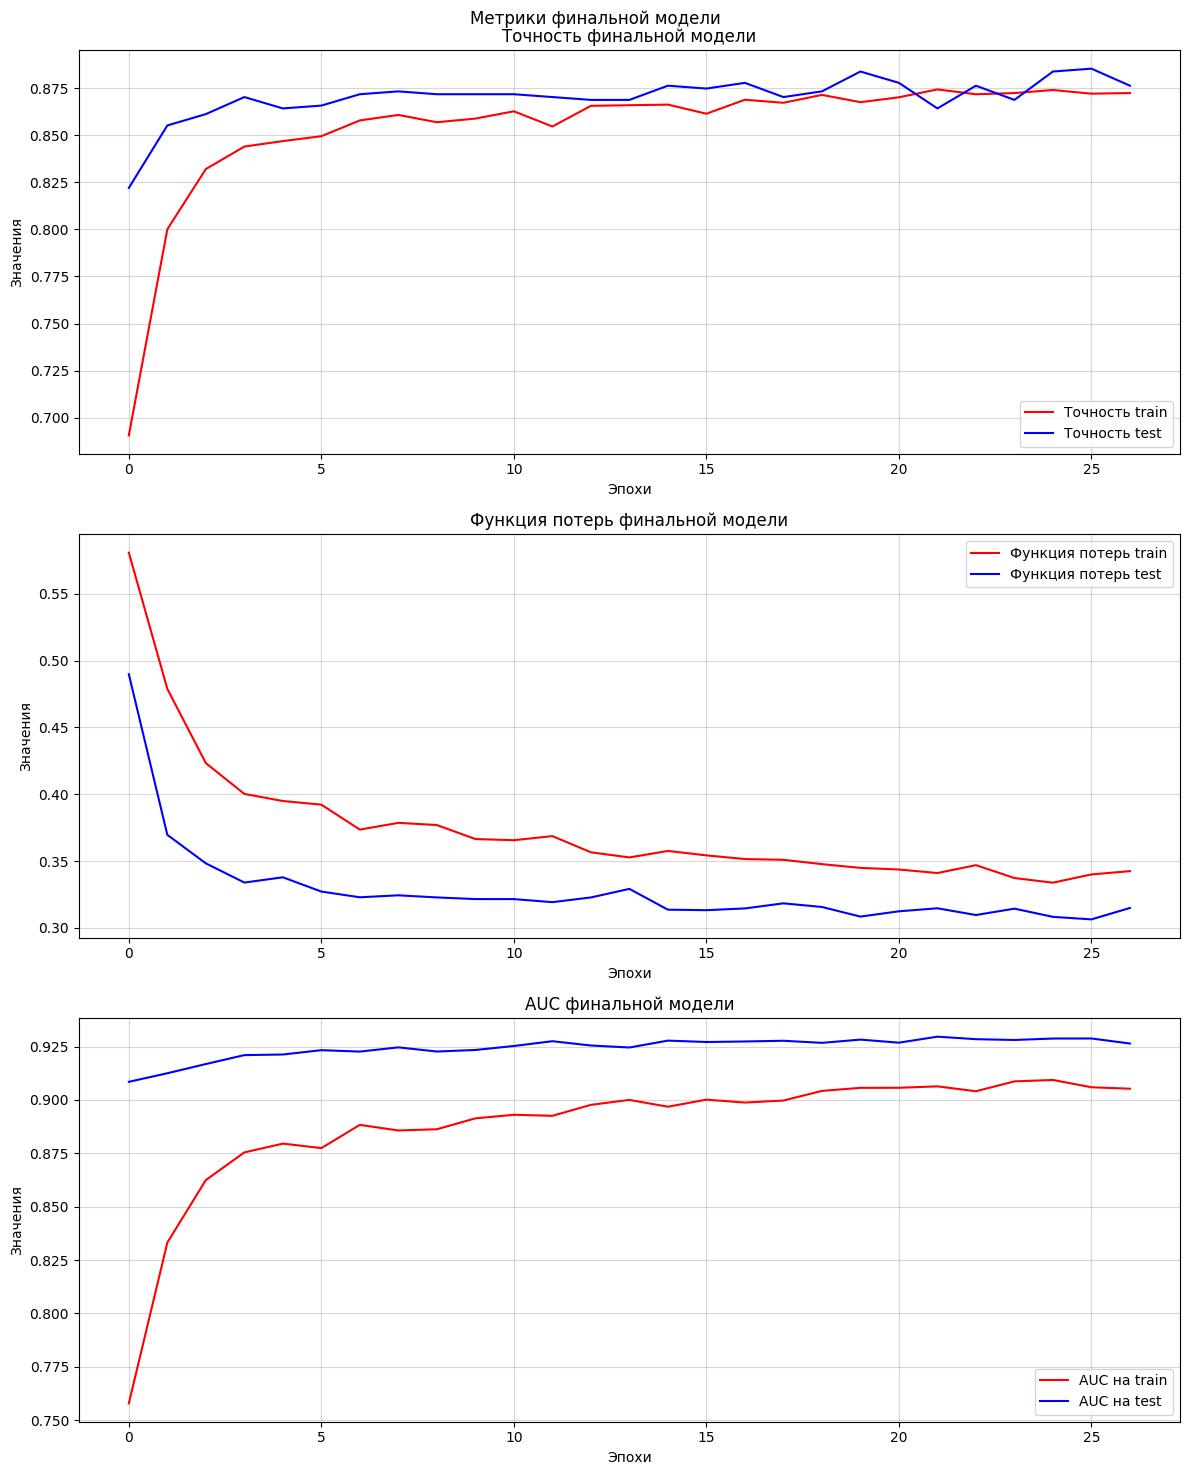

In [40]:
plt.figure(figsize=(12,15))
plt.suptitle('Метрики финальной модели')

plt.subplot(3,1,1)
plt.plot(history_final.history['accuracy'], color='red', label='Точность train')
plt.plot(history_final.history['val_accuracy'], color='blue', label='Точность test')
plt.title('Точность финальной модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,2)
plt.plot(history_final.history['loss'], color='red', label='Функция потерь train')
plt.plot(history_final.history['val_loss'], color='blue', label='Функция потерь test')
plt.title('Функция потерь финальной модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.subplot(3,1,3)
plt.plot(history_final.history['auc'], color='red', label='AUC на train')
plt.plot(history_final.history['val_auc'], color='blue', label='AUC на test')
plt.title('AUC финальной модели')
plt.xlabel('Эпохи')
plt.ylabel('Значения')
plt.grid(alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

Сохранение модели

In [42]:
model_final.save('model.keras')